In [1]:
# Import libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# HyperParameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [4]:
# MNIST Dataset contains 0-9 digits
train_dataset = torchvision.datasets.MNIST(root = './data' , train = True, transform= transforms.ToTensor(), download=True)

In [5]:
# Test Dataset
test_dataset = torchvision.datasets.MNIST(root = './data' , train = False, transform=transforms.ToTensor())

In [6]:
# Train loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size= batch_size, shuffle=True)

# Test Loader
test_loader = torch.utils.data.DataLoader(dataset = test_dataset , batch_size= batch_size, shuffle=False)

In [7]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


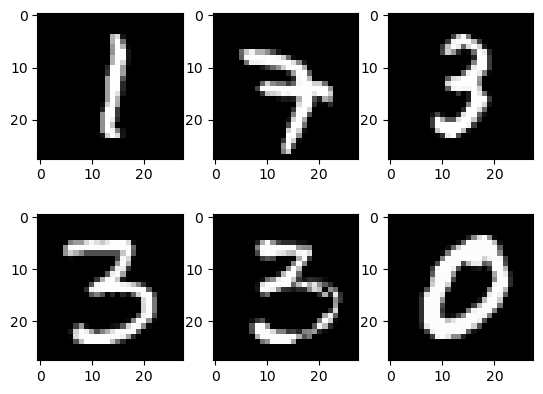

In [8]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0] , cmap="gray")
plt.show()

In [12]:
# Creating a Neural Network 
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(input_size , hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size , num_classes)
    
    def forward(self, x):
        inp = self.l1(x)
        hid = self.relu(inp)
        out = self.l2(hid)
        return out
        
model = NeuralNetwork(input_size, hidden_size, num_classes)

In [13]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
# Training Loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backwards
        optimizer.zero_grad()
        loss.backward()
        # Step method will update the parameters
        optimizer.step()
        
        if(i+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

Epoch 1/2, step 100/600, loss = 0.4201
Epoch 1/2, step 200/600, loss = 0.4676
Epoch 1/2, step 300/600, loss = 0.2805
Epoch 1/2, step 400/600, loss = 0.1899
Epoch 1/2, step 500/600, loss = 0.3186
Epoch 1/2, step 600/600, loss = 0.1731
Epoch 2/2, step 100/600, loss = 0.2136
Epoch 2/2, step 200/600, loss = 0.2561
Epoch 2/2, step 300/600, loss = 0.1111
Epoch 2/2, step 400/600, loss = 0.0567
Epoch 2/2, step 500/600, loss = 0.1479
Epoch 2/2, step 600/600, loss = 0.1061


In [16]:
# Testing 
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # values, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy : {acc}')

Accuracy : 95.46
